# **Analiza danych dotyczących zmian średnich temperatur**

------

## Poniższa analiza składa się z dwóch rzeczy:
- oczyszczenie danych z braków, sformatowanie danych pod kątem wizualizacji oraz wyciągnięcia wniosków
- wizualizacja danych na przykładach

## Do prezentacji poniższego kodu użyto bibliotek w następujących wersjach:
- Python - 3.11.5
- Pandas - 2.1.1
- Matplotlib - 3.8.0
- Seaborn - 0.12.2

### Import potrzebnych bibliotek

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Import oraz oczyszczanie i przygotowanie danych do wizualizacji

In [87]:
data = pd.read_csv("Environment_Temperature_change.csv", encoding='latin-1')

In [88]:
data.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [89]:
data.describe()

,Area Code,Months Code,Element Code,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,9656.000000,9656.000000,9656.00000,8287.000000,8322.000000,8294.000000,8252.000000,8281.000000,8364.000000,8347.000000,...,8435.000000,8437.000000,8350.000000,8427.000000,8377.000000,8361.000000,8348.000000,8366.000000,8349.000000,8365.000000
mean,821.806338,7009.882353,6674.50000,0.402433,0.315527,0.317393,0.269382,0.217839,0.376419,0.263239,...,0.884504,0.768488,0.788930,0.829647,0.913872,1.018816,1.081491,1.003342,1.010832,1.094599
std,1781.072213,6.038255,596.53089,0.701567,0.713777,0.853133,0.749216,0.739418,0.737370,0.725421,...,0.878303,0.750631,0.858586,0.713753,0.815933,0.840189,0.877399,0.809800,0.872199,0.853953
min,1.000000,7001.000000,6078.00000,-4.018000,-5.391000,-8.483000,-7.309000,-4.728000,-8.147000,-6.531000,...,-6.072000,-4.854000,-5.785000,-3.642000,-5.367000,-4.068000,-3.306000,-3.584000,-2.216000,-2.644000
25%,78.000000,7005.000000,6078.00000,0.057000,-0.033000,0.030250,-0.102500,-0.214000,0.055000,-0.169000,...,0.392000,0.365000,0.372250,0.408500,0.418000,0.437000,0.457000,0.443000,0.434000,0.455000
50%,153.500000,7009.000000,6674.50000,0.366000,0.333000,0.355000,0.326000,0.303000,0.360000,0.313000,...,0.771000,0.640000,0.651000,0.719000,0.745000,0.858000,0.949000,0.865000,0.810000,0.939000
75%,226.250000,7016.000000,7271.00000,0.676500,0.627000,0.647750,0.609000,0.584000,0.660250,0.601000,...,1.276500,1.091000,1.108000,1.126000,1.190000,1.389000,1.496000,1.364750,1.341000,1.508000
max,5873.000000,7020.000000,7271.00000,5.771000,4.373000,4.666000,5.233000,5.144000,5.771000,4.768000,...,7.190000,6.531000,10.826000,6.738000,11.759000,7.590000,10.478000,7.389000,9.228000,7.215000


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     9656 non-null   int64  
 1   Area          9656 non-null   object 
 2   Months Code   9656 non-null   int64  
 3   Months        9656 non-null   object 
 4   Element Code  9656 non-null   int64  
 5   Element       9656 non-null   object 
 6   Unit          9656 non-null   object 
 7   Y1961         8287 non-null   float64
 8   Y1962         8322 non-null   float64
 9   Y1963         8294 non-null   float64
 10  Y1964         8252 non-null   float64
 11  Y1965         8281 non-null   float64
 12  Y1966         8364 non-null   float64
 13  Y1967         8347 non-null   float64
 14  Y1968         8345 non-null   float64
 15  Y1969         8326 non-null   float64
 16  Y1970         8308 non-null   float64
 17  Y1971         8303 non-null   float64
 18  Y1972         8323 non-null 

In [91]:
data.isnull().sum()

Area Code          0
Area               0
Months Code        0
Months             0
Element Code       0
                ... 
Y2015           1295
Y2016           1308
Y2017           1290
Y2018           1307
Y2019           1291
Length: 66, dtype: int64

In [92]:
numeric_columns = data.select_dtypes(include=[np.number]).columns

data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

data.isnull().sum()

Area Code       0
Area            0
Months Code     0
Months          0
Element Code    0
               ..
Y2015           0
Y2016           0
Y2017           0
Y2018           0
Y2019           0
Length: 66, dtype: int64

In [93]:
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace('y','')
data.head()

,area code,area,months code,months,element code,element,unit,1961,1962,1963,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [94]:
data.drop(columns=['area code', 'months code', 'element code', 'unit'], inplace=True)
data.head()

,area,months,element,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,January,Temperature change,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,January,Standard Deviation,1.950,1.950,1.950,1.950,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,Afghanistan,February,Temperature change,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,Afghanistan,February,Standard Deviation,2.597,2.597,2.597,2.597,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,Afghanistan,March,Temperature change,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [95]:
data['months'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Dec\x96Jan\x96Feb', 'Mar\x96Apr\x96May', 'Jun\x96Jul\x96Aug',
       'Sep\x96Oct\x96Nov', 'Meteorological year'], dtype=object)

In [121]:
seasons_replace = {'Dec\x96Jan\x96Feb': 'Winter',
                   'Mar\x96Apr\x96May': 'Spring',
                   'Jun\x96Jul\x96Aug': 'Summer',
                   'Sep\x96Oct\x96Nov': 'Fall', }

data.replace(seasons_replace, inplace=True)
data['months'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December', 'Winter',
       'Spring', 'Summer', 'Fall', 'Meteorological year'], dtype=object)

In [97]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
seasons = ['Winter', 'Spring', 'Summer', 'Fall']

In [98]:
data.area.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslov

In [99]:
data = data[data['element'] == 'Temperature change']

In [100]:
data = pd.melt(data, id_vars=['area', 'months','element'], var_name='year', value_name='temp_change')
data['year'] = [i.split('Y')[-1] for i in data.year]

In [123]:
data.head()

,area,months,element,year,temp_change
0,Afghanistan,January,Temperature change,1961,0.777
1,Afghanistan,February,Temperature change,1961,-1.743
2,Afghanistan,March,Temperature change,1961,0.516
3,Afghanistan,April,Temperature change,1961,-1.709
4,Afghanistan,May,Temperature change,1961,1.412


In [119]:
data['year'] = pd.to_numeric(data['year'], errors='coerce')
data['temp_change'] = pd.to_numeric(data['temp_change'], errors='coerce')

# 2. Wizualizacja danych oraz pokazanie trendu

## Na początku przyjrzyjmy się rozkładowi zmian temperatury według kontynentów.

c:\Users\Krzysztof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Krzysztof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Krzysztof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


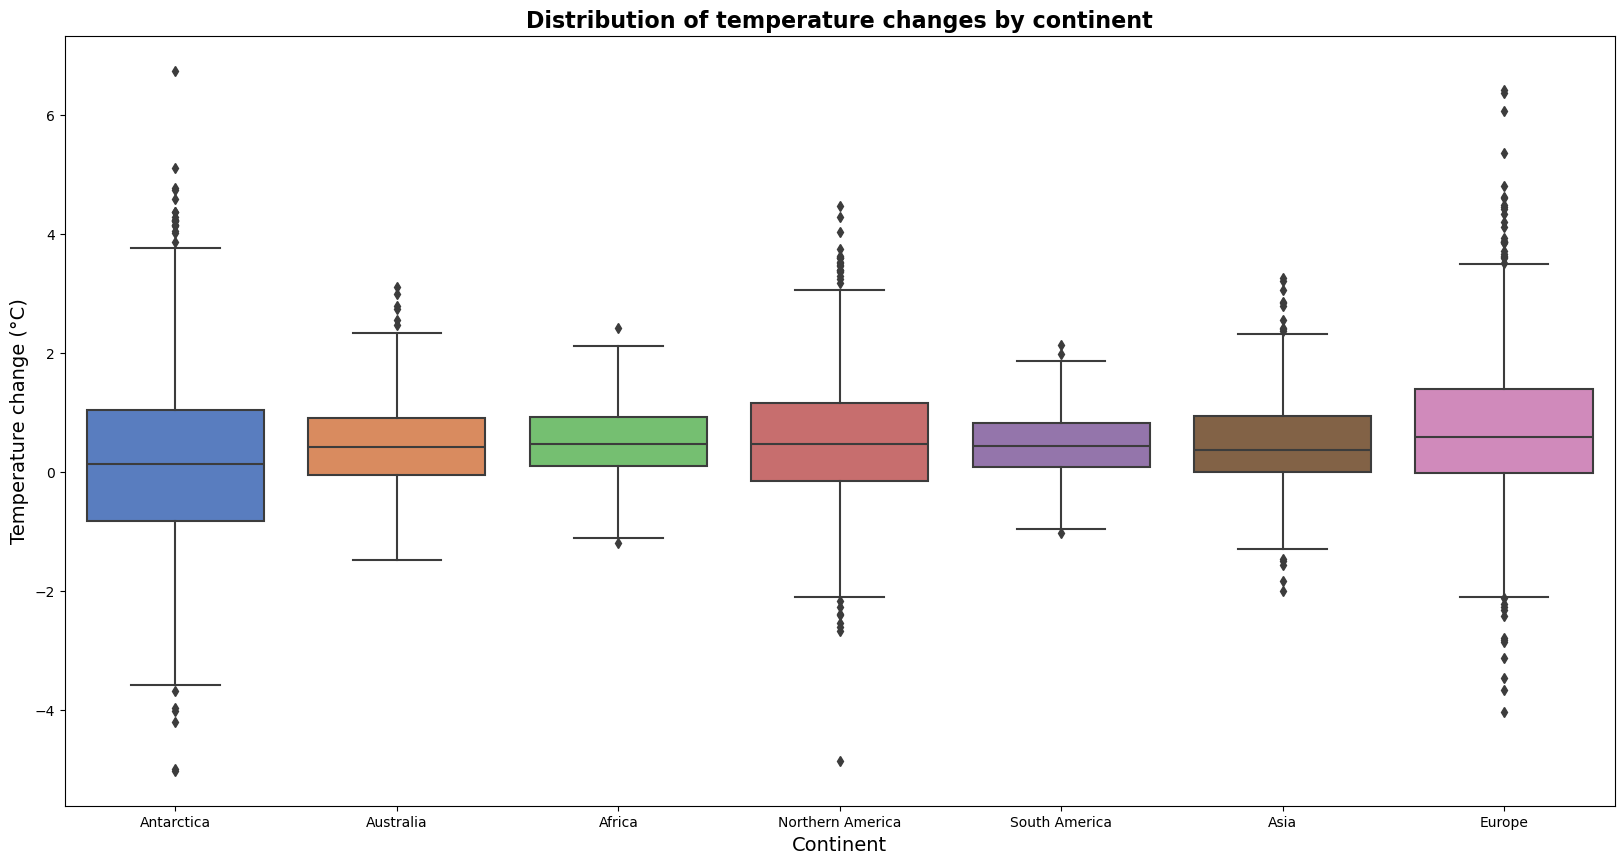

In [176]:
data_continents = data[data['area'].isin(['Africa', 'Asia', 'Europe', 'Northern America', 'South America', 'Australia', 'Antarctica'])]

plt.figure(figsize=(20, 10))
ax = sns.boxplot(x='area', y='temp_change', data=data_continents)

plt.title("Distribution of temperature changes by continent", weight='bold', fontsize=16)
plt.xlabel("Continent", fontsize=14)
plt.ylabel("Temperature change (°C)", fontsize=14)

plt.show()

## Wniosek: 
### Zgodnie z wykresem, na wszystkich kontynentach średni wzrost temperatury jest większy niż 0, a niektóre kwartyle osiągają wartość bliską lub większą 1.

---

## Trend zmiany temperatury na świecie oraz w Europie.

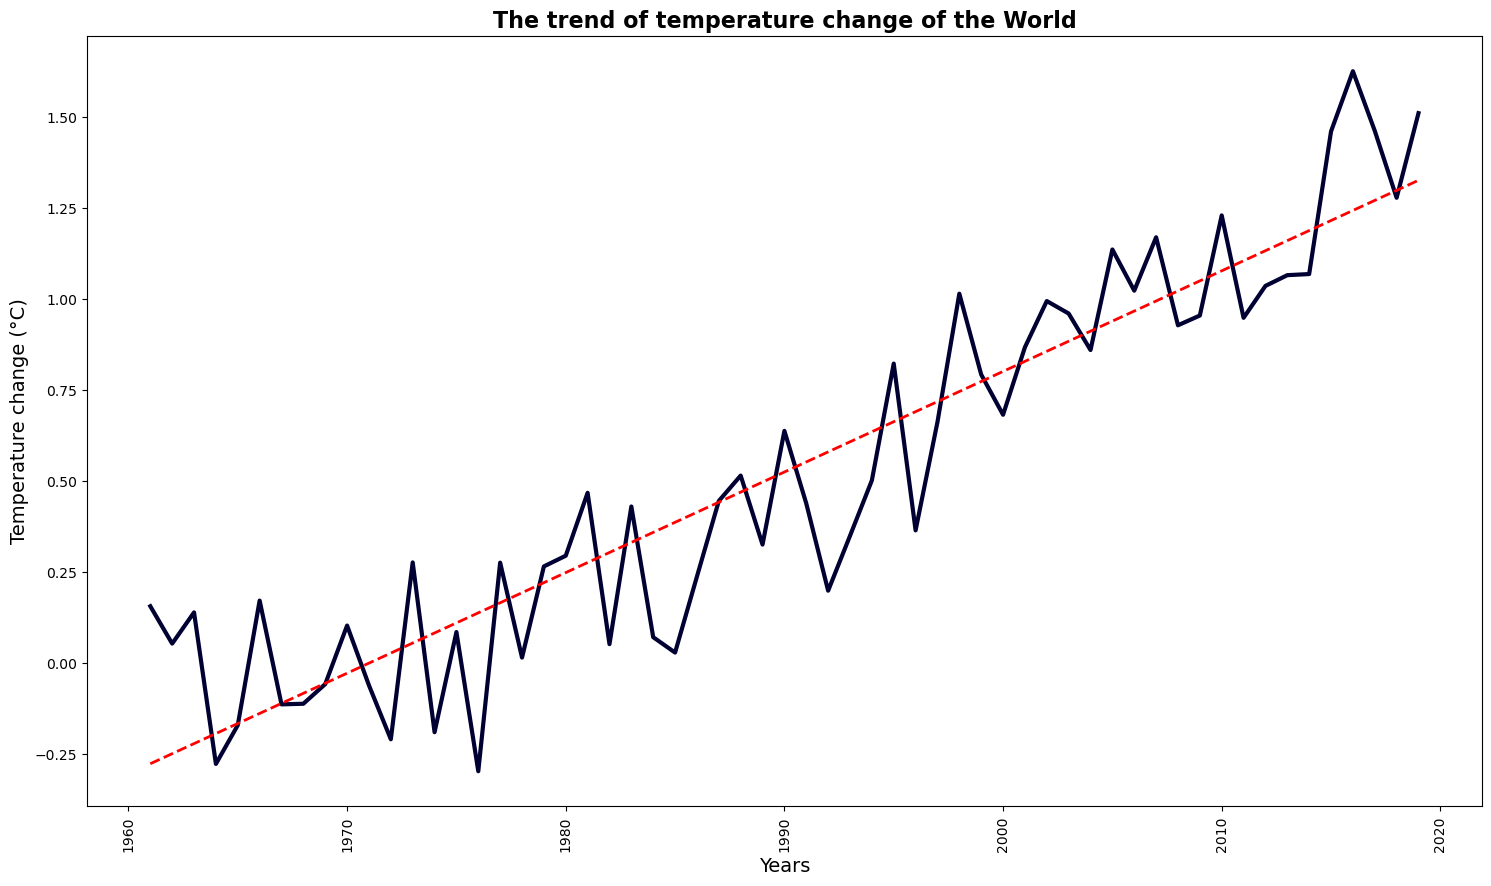

In [124]:
data_world = data[data['area'] == 'World']
data_world = data_world.groupby(['year'], as_index=False).mean(numeric_only=True)

fig = plt.figure(figsize=(18, 10))

plt.plot(data_world['year'], data_world['temp_change'], '-', color='#000033', linewidth=3)

z = np.polyfit(data_world['year'], data_world['temp_change'], 1)
p = np.poly1d(z)

plt.plot(data_world['year'], p(data_world['year']), '--', color='red', linewidth=2, label='Trend Line') 

plt.xticks(rotation=90)
plt.title("The trend of temperature change of the World", weight='bold', fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Temperature change (°C)", fontsize=14)

plt.show()

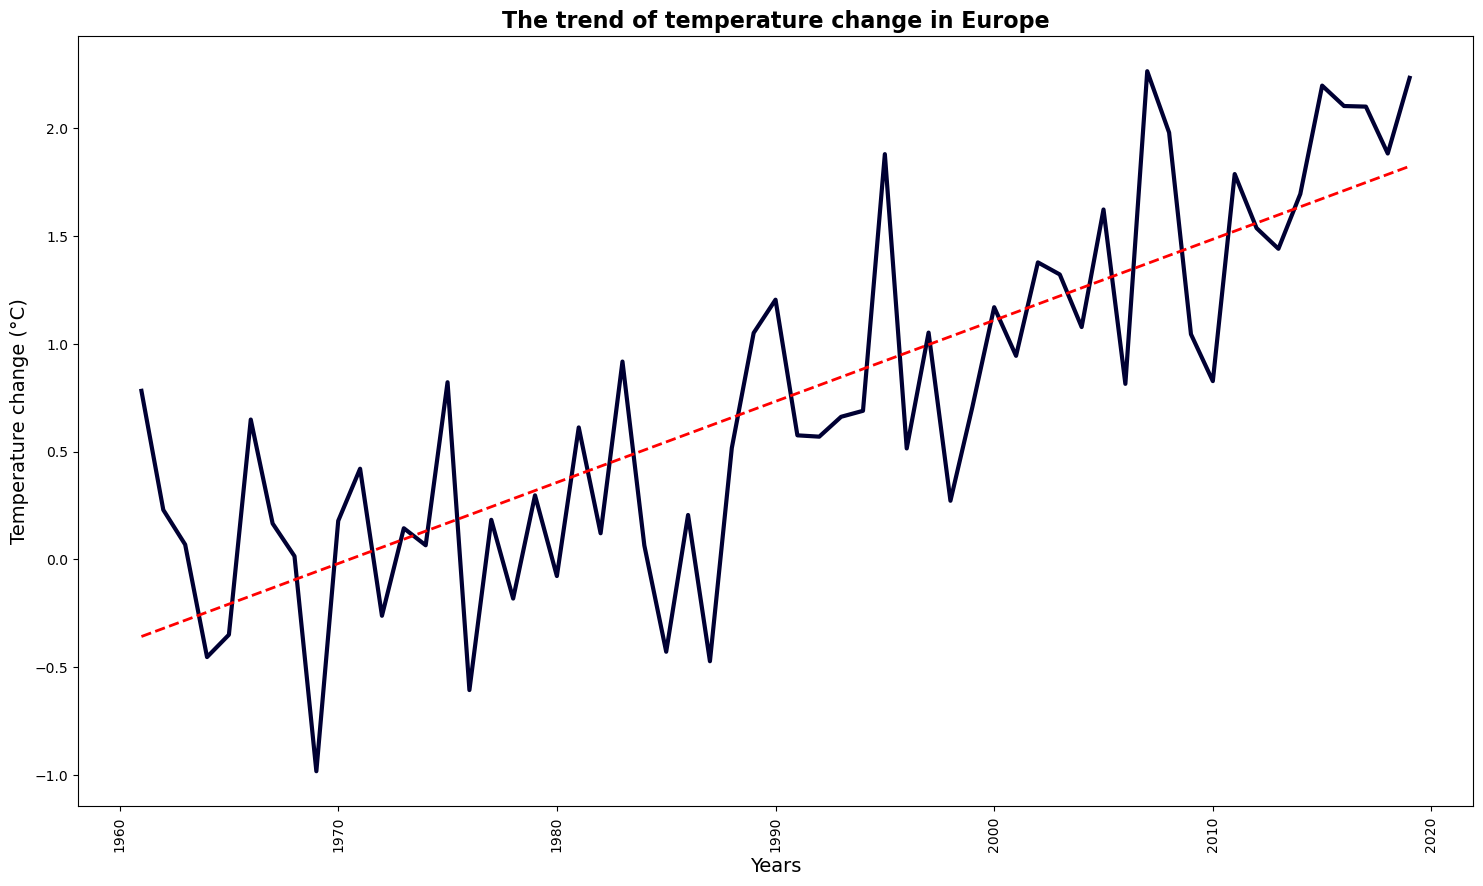

In [125]:
data_world = data[data['area'] == 'Europe']
data_world = data_world.groupby(['year'], as_index=False).mean(numeric_only=True)

fig = plt.figure(figsize=(18, 10))

plt.plot(data_world['year'], data_world['temp_change'], '-', color='#000033', linewidth=3)

z = np.polyfit(data_world['year'], data_world['temp_change'], 1)
p = np.poly1d(z)
plt.plot(data_world['year'], p(data_world['year']), '--', color='red', linewidth=2, label='Trend Line') 

plt.xticks(rotation=90)
plt.title("The trend of temperature change in Europe", weight='bold', fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Temperature change (°C)", fontsize=14)

plt.show()

## Wniosek: 
### Jak widać na powyższych wykresach, z roku na rok temperatury wzrastają na świecie, jak i w Europie.

---

## Teraz przyjrzyjmy się krajom z największą i najmniejszą średnią zmianą temperatury na przestrzeni ostatniej dekady - tu na przykładzie pierwszych dziesięciu krajów w zestawieniu.

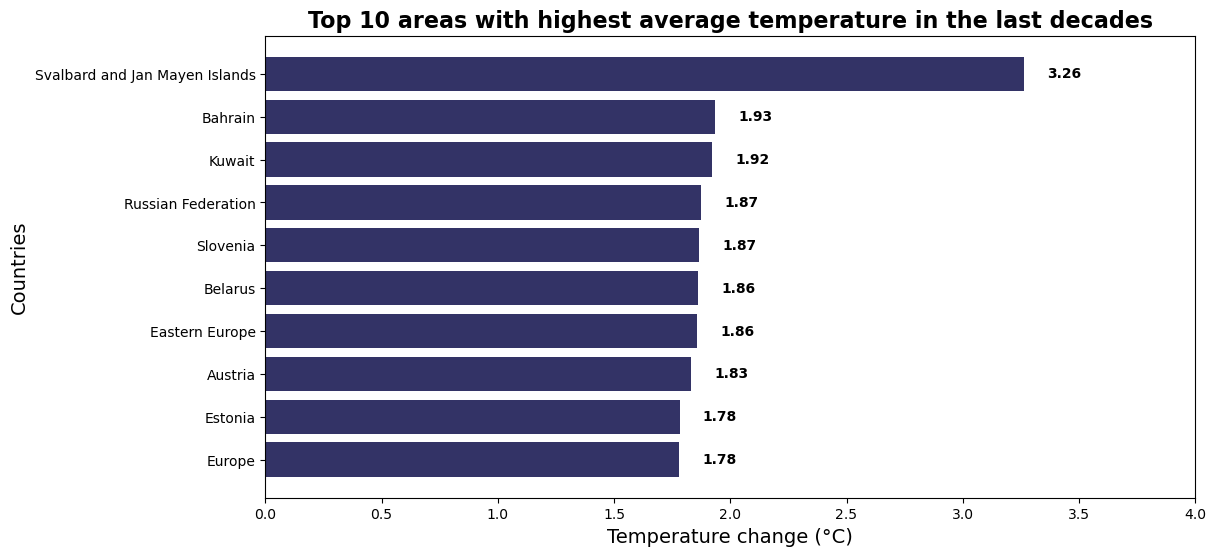

In [178]:
data_highest = data.copy()
data_highest.set_index('year', inplace=True)

data_highest = data_highest.loc[[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]]
data_highest.reset_index(inplace=True)

data_highest = data_highest.groupby(['area']).agg({'temp_change':'mean'})
data_highest.reset_index(inplace=True)

data_highest = data_highest.sort_values(by=['temp_change'], ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12,6))

bar1 = plt.barh(data_highest['area'], data_highest['temp_change'], color='#333366')

temp = round(data_highest['temp_change'], 2).to_list()

for i, p in enumerate(bar1):
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height()/2, f'{temp[i]}', va='center', ha='left', weight='bold')

ax.set_xlim([0, 4.0])
ax.invert_yaxis()

plt.title("Top 10 areas with highest average temperature in the last decades", weight='bold', fontsize=16)
plt.xlabel("Temperature change (°C)", fontsize=14)
plt.ylabel("Countries", fontsize=14)

plt.show()

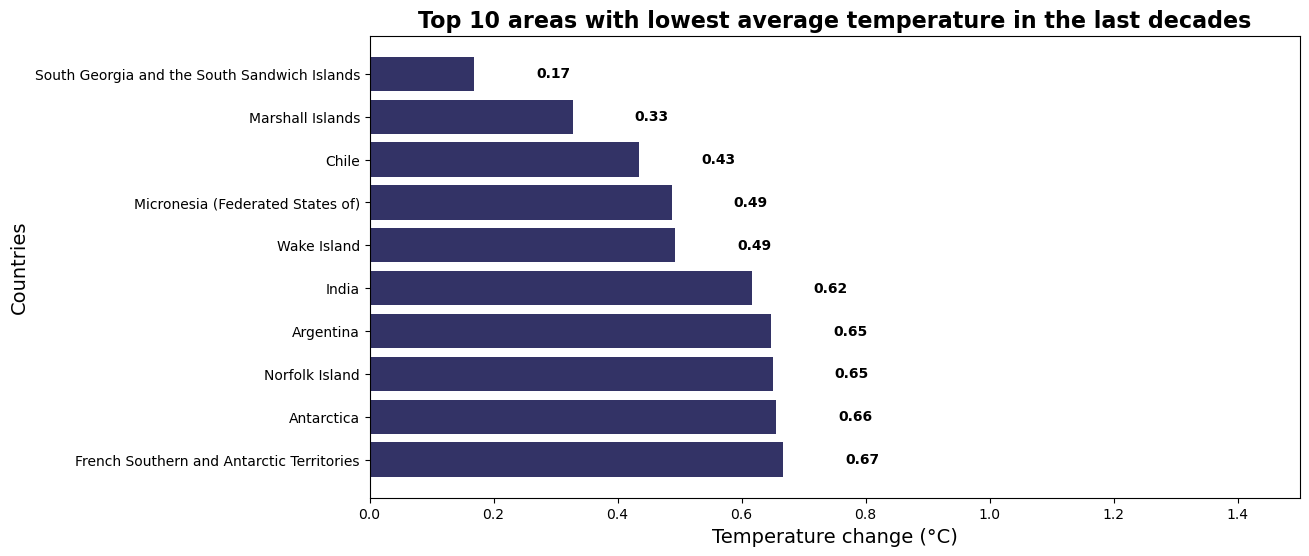

In [179]:
data_lowest = data.copy()
data_lowest.set_index('year', inplace=True)

data_lowest = data_lowest.loc[[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]]
data_lowest.reset_index(inplace=True)

data_lowest = data_lowest.groupby(['area']).agg({'temp_change':'mean'})
data_lowest.reset_index(inplace=True)

data_lowest = data_lowest.sort_values(by=['temp_change']).head(10)

fig, ax = plt.subplots(figsize=(12,6))

bar1 = plt.barh(data_lowest['area'], data_lowest['temp_change'], color='#333366')

temp = round(data_lowest['temp_change'], 2).to_list()

for i, p in enumerate(bar1):
    plt.text(p.get_width() + 0.1, p.get_y() + p.get_height()/2, f'{temp[i]}', va='center', ha='left', weight='bold')

ax.set_xlim([0, 1.5])
ax.invert_yaxis()

plt.title("Top 10 areas with lowest average temperature in the last decades", weight='bold', fontsize=16)
plt.xlabel("Temperature change (°C)", fontsize=14)
plt.ylabel("Countries", fontsize=14)

plt.show()

## Wniosek:
### Na wykresie z najniższą średnią zmianą temperatury widnieją Indie, które podejmują wiele działań dążących do uprzemysłowienia kraju w dość niekontrolowany sposób co, jak widać, może nie mieć aż tak dużego wpływu na zmiany średnich temperatur.

---

## Zmiana temperatury na wyspach Svalbard i Jan Mayen, Południowa Georgia i wyspach Sandwich.

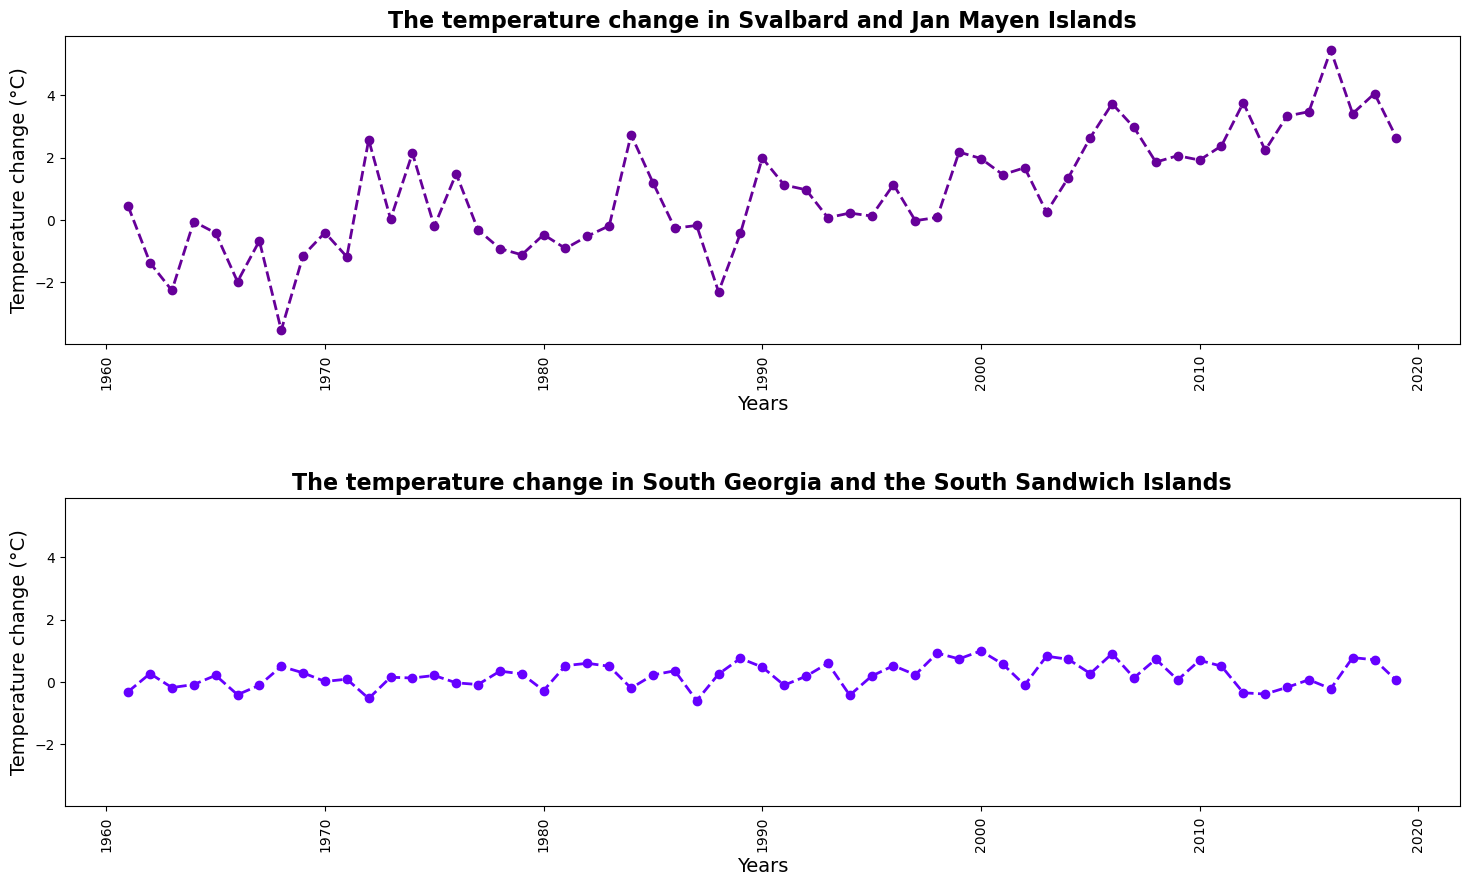

In [151]:
df1 = data[data['area'] == 'Svalbard and Jan Mayen Islands']
country1 = df1.groupby(['year',]).agg({'temp_change':'mean'})
country1.reset_index(inplace=True)

df2 = data[data['area'] == 'South Georgia and the South Sandwich Islands']
country2 = df2.groupby(['year',]).agg({'temp_change':'mean'})
country2.reset_index(inplace=True)

fig = plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.5)

ax1 = fig.add_subplot(211)
plt.xticks(rotation=90)
plt.plot(country1['year'], country1['temp_change'], 'o--', color='#660099', linewidth=2)
plt.title("The temperature change in Svalbard and Jan Mayen Islands", weight='bold', fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Temperature change (°C)", fontsize=14)

ax2 = fig.add_subplot(212, sharey=ax1)
plt.xticks(rotation=90)
plt.plot(country2['year'], country2['temp_change'], 'o--', color='#6600FF', linewidth=2)
plt.title("The temperature change in South Georgia and the South Sandwich Islands", weight='bold', fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Temperature change (°C)", fontsize=14)

plt.show()

## Wniosek:
### Zmiana temperatury na wyspach Svalbard i Jan Mayen waha się i ma tendencję do wzrostu po 1990r. Z drugiej strony zmiana temperatury w Południowej Georgii i wyspach Sandwich jest dość stabilna. Nie ma gwałtownego wzrostu ani spadku.

---

## Podsumowując:
### Powyższe wykresy zostały wygenerowane na podstawie zbioru danych, w którym zawarte zostały wartości temperatur na całym świecie, począwszy od roku 1961 do roku 2019. Tendencja wzrostu temperatury, która została ukazana na jednym z powyższych wykresów, jest ważna i istotna w celu podjęcia wszelkich środków i działań dążących do walki ze zjawiskiem globalnego ocieplania się klimatu. Jednocześnie trzeba zgłębić wiedzę na temat niektórych krajów, przeprowadzić dodatkowe badania i analizy, mające na celu zrozumienie dlaczego dzieje się tak, a nie inaczej.